In [2]:
# Imports
from bertopic import BERTopic
import pandas as pd
import numpy as np
import nltk 
import matplotlib.pyplot as plt

/home/jnye/miniconda3/envs/bach_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# loading the datasets
# TOPICS 
weekly_topis = pd.read_csv("output_hpc/weekly_topics_oldmodel.csv", sep="\t")
reclustered_weekly_topics = pd.read_csv("output_hpc/reclustered_weekly_topics_oldmodel.csv", sep="\t")


# WEEKLY DATA 
weekly_topic_data = pd.read_csv("topic_modelling/messages_topics.csv")
reclustered_weekly_data = pd.read_csv("output_hpc/reclustered_weekly_data_oldmodel.csv")
auto_recluster_weekly_data = pd.read_csv("output_hpc/auto_reclustered_weekly_data_oldmodel.csv")

#MONTHLY DATA 
monthly_topic_data = pd.read_csv("output_hpc/montly_topics_oldmodel.csv")
reclustered_monthly_data = pd.read_csv("output_hpc/reclustered_monthly_data_oldmodel.csv")
auto_recluster_monthly_data = pd.read_csv("output_hpc/autoreclust_monthly_data_oldmodel.csv")

In [29]:
df = reclustered_monthly_data
df.shape

(2161823, 11)

In [43]:
# filtering the data to only get the interesting topics 
# chosen_topics_normal = [0,1,2,4,5,6]
chosen_topics_reclust = [0,1,2,3,4,6,10,11,12,17,23]

df = df[df["topic"].isin(chosen_topics_reclust)]
df.shape

(170873, 11)

In [ ]:
import pandas as pd
import itertools
from collections import Counter

chosen_topics_reclust = [0,1,2,3,4,6,10,11,12,17,23]

# filter the DataFrame to keep only rows with topics in chosen_topics_reclust
df_filtered = df[df['topic'].isin(chosen_topics_reclust)]

# group by user and aggregate the set of topics the user has written messages for
user_topics = df_filtered.groupby('user')['topic'].apply(set).reset_index()

# generate combinations of topics (at least 3 topics) for each user
combinations = []
for _, row in user_topics.iterrows():
    topics = row['topic']
    if len(topics) >= 3:  # Only consider users who have written in at least 3 topics
        # Generate all combinations of size >= 3
        for size in range(3, len(topics) + 1):
            combinations.extend(itertools.combinations(sorted(topics), size))

# count how many users wrote messages for each combination
combination_counts = Counter(combinations)

# get the most common combinations
most_common_combinations = combination_counts.most_common()

# print the most common combinations (topic sets and their user counts)
for combo, count in most_common_combinations:
    print(f"Topic Combination: {combo}, User Count: {count}")

Topic Combination: (0, 1, 2), User Count: 1009
Topic Combination: (1, 2, 12), User Count: 839
Topic Combination: (0, 1, 12), User Count: 835
Topic Combination: (1, 2, 11), User Count: 823
Topic Combination: (1, 11, 12), User Count: 811
Topic Combination: (0, 1, 11), User Count: 792
Topic Combination: (1, 10, 12), User Count: 780
Topic Combination: (0, 1, 6), User Count: 774
Topic Combination: (1, 2, 6), User Count: 749
Topic Combination: (1, 2, 4), User Count: 706
Topic Combination: (0, 1, 10), User Count: 682
Topic Combination: (1, 6, 12), User Count: 671
Topic Combination: (1, 2, 10), User Count: 646
Topic Combination: (1, 6, 11), User Count: 640
Topic Combination: (1, 4, 12), User Count: 571
Topic Combination: (1, 3, 12), User Count: 562
Topic Combination: (1, 10, 11), User Count: 559
Topic Combination: (1, 4, 11), User Count: 532
Topic Combination: (0, 2, 6), User Count: 530
Topic Combination: (0, 2, 12), User Count: 527
Topic Combination: (1, 4, 6), User Count: 523
Topic Combinati

In [59]:
import pandas as pd

# Assuming df is the DataFrame with columns ['user', 'message', 'topic_id']

# Define the topics we're interested in
required_topics = {3, 4, 12 }

# 1. Filter the DataFrame to keep only rows with topics 0, 1, or 2
df_filtered = df[df['topic'].isin(required_topics)]

# 2. Group by user and aggregate the set of topics they have written messages for
user_topics = df_filtered.groupby('user')['topic'].apply(set).reset_index()

# 3. Filter users who have written in all three topics (0, 1, 2)
users_with_required_topics = user_topics[user_topics['topic'].apply(lambda x: required_topics.issubset(x))]

# 4. Count the number of users who meet this condition
num_users = users_with_required_topics.shape[0]

# Print the result
print(f"Number of users who wrote messages in at least topics 0, 1, and 2: {num_users}")


Number of users who wrote messages in at least topics 0, 1, and 2: 284


In [48]:
# 5. Convert the combination counts into a DataFrame
topic_combinations_df = pd.DataFrame(combination_counts.items(), columns=['topic_combination', 'user_count'])

# 6. Sort the DataFrame by user_count (descending order)
topic_combinations_df = topic_combinations_df.sort_values(by='user_count', ascending=False)

# Print the resulting DataFrame
print(topic_combinations_df.head(10))

   topic_combination  user_count
12         (0, 1, 2)        1009
33        (1, 2, 12)         839
16        (0, 1, 12)         835
2         (1, 2, 11)         823
7        (1, 11, 12)         811
15        (0, 1, 11)         792
40       (1, 10, 12)         780
11         (0, 1, 6)         774
0          (1, 2, 6)         749
1          (1, 2, 4)         706


In [52]:
topic_combinations_df['topic_combination'] = topic_combinations_df['topic_combination'].apply(lambda x: ', '.join(map(str, x)))

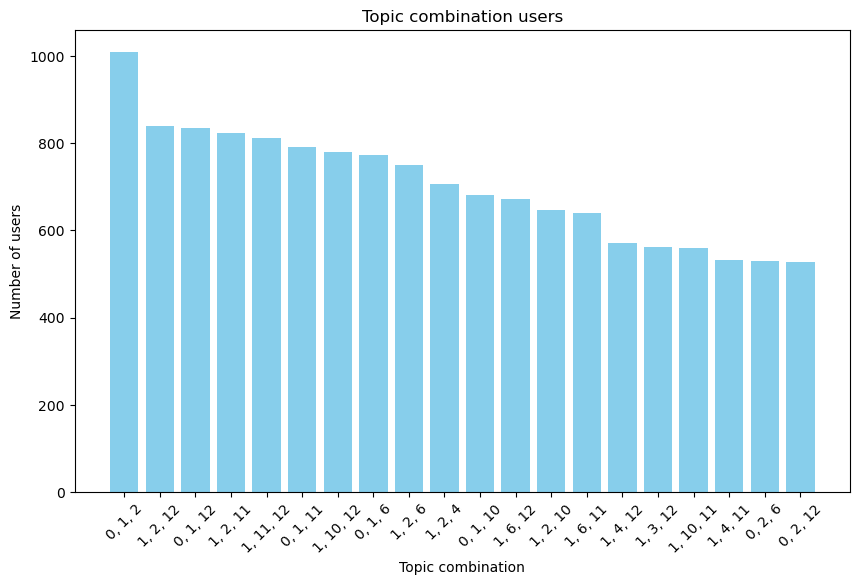

In [53]:
top_topic_combinations = topic_combinations_df.head(20)
plt.figure(figsize=(10, 6))
plt.bar(top_topic_combinations['topic_combination'], top_topic_combinations['user_count'], color='skyblue')
plt.xlabel('Topic combination')
plt.ylabel('Number of users')
plt.title('Topic combination users')
plt.xticks(rotation=45)
plt.show()

In [50]:
weekly_topic_2 = pd.read_csv("output_hpc/weekly_data_oldmodel_2.csv")

In [51]:
weekly_topic_2[weekly_topic_2["topic"]==0]

,Unnamed: 0,id,user,text,topic,topic_name
202,202,j0s3aw4,Carbonatite,"And ultimately, the implications of this are p...",0,0_abortion_abortions_fetus_pregnancy
404,404,j0s4800,whereyugoincityboy,there’s also a reasonable argument that it was...,0,0_abortion_abortions_fetus_pregnancy
406,406,j0s48fh,V-ADay2020,And it's *not and never been* how Republicans...,0,0_abortion_abortions_fetus_pregnancy
691,691,j0s5ocy,millennialbeatlesfan,It’s even worse than them believing a wanted p...,0,0_abortion_abortions_fetus_pregnancy
1029,1029,j0s7ej3,STThornton,The caretaker’s wishes in this case would be t...,0,0_abortion_abortions_fetus_pregnancy
...,...,...,...,...,...,...
290431,290431,j1nxdfr,CapybaraPacaErmine,I'll go a step further and say anyone who supp...,0,0_abortion_abortions_fetus_pregnancy
290469,290469,j1nxl1w,CapybaraPacaErmine,If the right truly does understand more about ...,0,0_abortion_abortions_fetus_pregnancy
290731,290731,j1nyv8e,OkEntertainment2046,Walter thought me well. We do that in abortion.,0,0_abortion_abortions_fetus_pregnancy
290744,290744,j1nyxj2,Fit-Order-9468,This happened already: when Roe was overturne...,0,0_abortion_abortions_fetus_pregnancy


##### Checking the network

In [17]:
import networkx as nx
reclustered_monthly_data = pd.read_csv("output_hpc/reclustered_monthly_data_oldmodel.csv")
network_data = pd.read_csv("reddit_22_51/network.csv", sep = "\t")
user_nodeid = pd.read_csv("reddit_22_51/user_nodeid.csv", sep = "\t")

In [21]:
required_topics = {1, 3, 12}

# 1. Filter the DataFrame to only include rows with topics 1, 3, or 12
df_filtered = reclustered_monthly_data[reclustered_monthly_data['topic'].isin(required_topics)]

# 2. Group by user and aggregate the set of topics they have written messages for
user_topics = df_filtered.groupby('user')['topic'].apply(set).reset_index()

# 3. Filter users who have written in all the required topics (1, 3, 12)
users_with_required_topics = user_topics[user_topics['topic'].apply(lambda x: required_topics.issubset(x))]

# 4. Extract the list of users who meet this condition
users = users_with_required_topics['user'].tolist()

In [45]:
network_users = user_nodeid[user_nodeid['index'].isin(users)]
network_userids = network_users["nodeid"].tolist()
network_data_filtered = network_data[network_data['src'].isin(network_userids) & network_data['trg'].isin(network_userids)]

In [47]:
network_data_filtered

,src,trg,nij,score
81,588398,248766,1,0.931018
100,588398,786502,1,0.986946
106,588398,798787,1,0.976465
118,588398,677078,1,0.977267
139,588398,1149016,1,0.993452
...,...,...,...,...
59613,1231657,1114560,4,0.999687
59726,1083511,1051525,8,0.999196
60204,1017708,114626,4,0.998907
60294,1045949,981283,6,0.999798


In [52]:
G = nx.from_pandas_edgelist(network_data_filtered, "src", 'trg')

In [53]:
print(G)

Graph with 371 nodes and 878 edges


In [56]:
largest_cc = max(nx.connected_components(G), key=len)
print(len(largest_cc))

327


In [31]:
for user in users: 
    if user not in user_nodeid['index'].tolist(): 
        print(user)

Momolith97
fftsteven


In [61]:
reclustered_monthly_data_grouped = reclustered_monthly_data.groupby("topic_name")["user"].nunique()
reclustered_monthly_data_grouped.head(30)

topic_name
-1_and_to_he_the                                 2775
0_socialism_capitalism_socialist_communism      10162
100_zelensky_zelenskyy_soros_ukrainian           1340
101_rights_natural_human_right                   3508
102_penalty_death_innocent_torture               3798
103_science_scientific_scientists_consensus      2773
104_system_problem_solution_solutions            2814
105_masks_mask_wear_wearing                      1732
106_true_fair_opposite_point                     8564
107_answer_question_paragraph_answered           4851
108_hunter_pete_joe_biden                        3048
109_eu_europe_euro_tariffs                       3273
10_feminism_gender_men_women                     7729
110_flair_flairs_flaired_mobile                  2160
111_crypto_gold_currency_silver                  2202
112_mccarthy_mitch_mcconnell_speaker             4100
113_suicide_euthanasia_assisted_suffering        2850
114_bot_bots_poll_botted                         3166
115_politicians_p

In [64]:
G = nx.from_pandas_edgelist(network_data, "src", 'trg')
print(G)

Graph with 18027 nodes and 62992 edges


In [69]:
reclustered_weekly_data = pd.read_csv("output_hpc/reclustered_weekly_data_oldmodel.csv")

reclustered_weekly_data["user"].nunique()

18027